In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Terdapat nilai 0 pada atribut **Glucose, BloodPressure, SkinThickness, Insulin, dan BMI** yang secara medis sangat **tidak mungkin terjadi** karena kadar glukosa darah, ketebalan kulit, kadar insulin, dan BMI tidak mungkin bernilai 0.

In [ ]:
#Tidak ada data null, data type sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


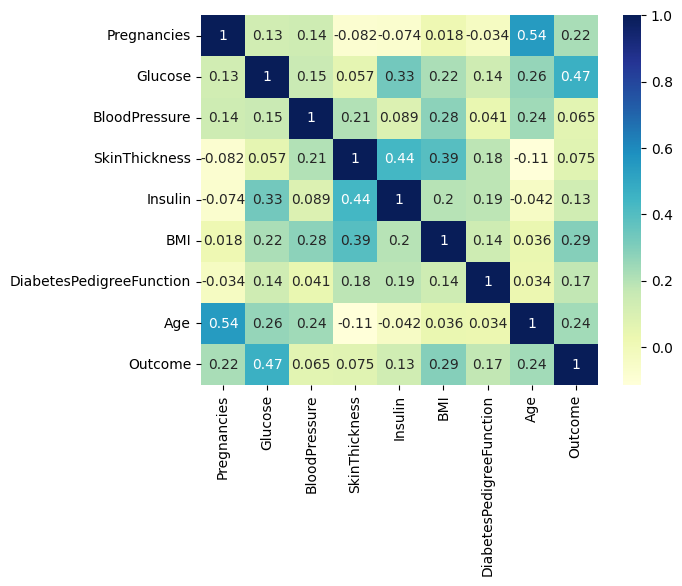

In [ ]:
import seaborn as sns

# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [6]:
#Hitung data dengan nilai 0 kecuali kolom Outcome
hitung=(df.drop(columns=['Outcome'])==0).sum().sum()
print(hitung)

763


**Split Data**

In [4]:
input = df.drop('Outcome', axis=1)
output = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 0)

**Check Outlier**

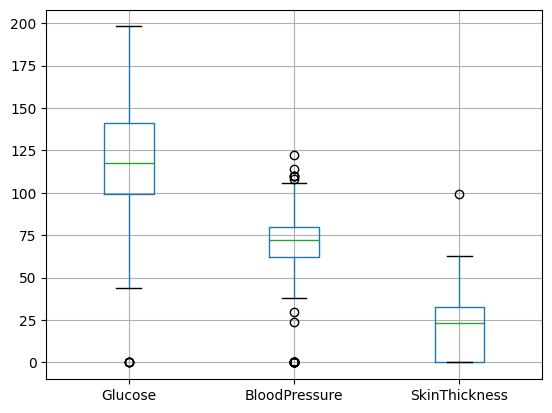

In [ ]:
boxplot = x_train.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness'])
plt.show()

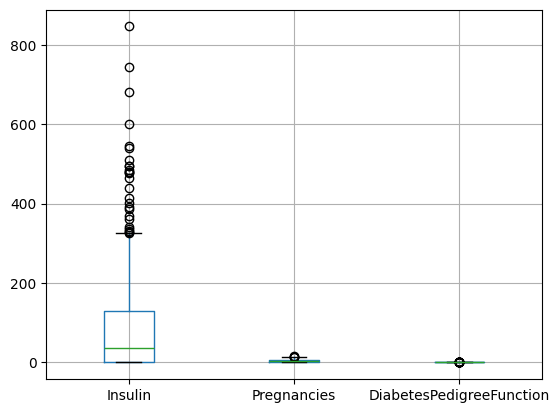

In [ ]:
boxplot = x_train.boxplot(column=['Insulin', 'Pregnancies', 'DiabetesPedigreeFunction'])
plt.show()

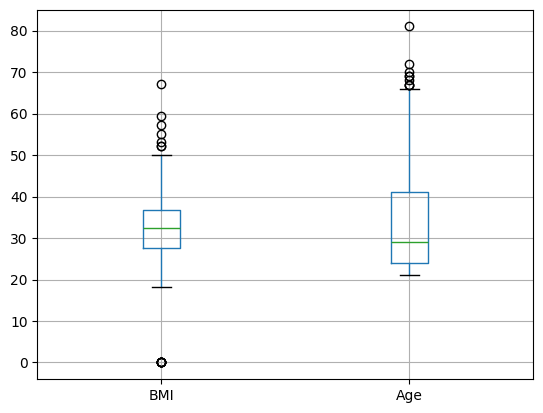

In [ ]:
boxplot = x_train.boxplot(column=['BMI', 'Age'])
plt.show()

# **DATA PREPARATION**

### **Impute Missing Value**

In [ ]:
(x_train==0).sum()

,0
Pregnancies,95
Glucose,4
BloodPressure,29
SkinThickness,182
Insulin,294
BMI,8
DiabetesPedigreeFunction,0
Age,0


In [ ]:
(x_test==0).sum()

,0
Pregnancies,16
Glucose,1
BloodPressure,6
SkinThickness,45
Insulin,80
BMI,3
DiabetesPedigreeFunction,0
Age,0


In [ ]:
x_train.median()

,0
Pregnancies,3.000
Glucose,117.500
BloodPressure,72.000
SkinThickness,23.000
Insulin,37.000
BMI,32.400
DiabetesPedigreeFunction,0.369
Age,29.000


In [6]:
# Menghitung median untuk setiap kolom dalam x_train
median_glucose = x_train['Glucose'].median()
median_blood_pressure = x_train['BloodPressure'].median()
median_skin_thickness = x_train['SkinThickness'].median()
median_insulin = x_train['Insulin'].median()
median_bmi = x_train['BMI'].median()

# Imputasi nilai 0 dalam x_train
x_train['Glucose'] = x_train['Glucose'].replace(0, median_glucose)
x_train['BloodPressure'] = x_train['BloodPressure'].replace(0, median_blood_pressure)
x_train['SkinThickness'] = x_train['SkinThickness'].replace(0, median_skin_thickness)
x_train['Insulin'] = x_train['Insulin'].replace(0, median_insulin)
x_train['BMI'] = x_train['BMI'].replace(0, median_bmi)

# Menghitung median untuk setiap kolom dalam x_test berdasarkan x_train
x_test['Glucose'] = x_test['Glucose'].replace(0, median_glucose)
x_test['BloodPressure'] = x_test['BloodPressure'].replace(0, median_blood_pressure)
x_test['SkinThickness'] = x_test['SkinThickness'].replace(0, median_skin_thickness)
x_test['Insulin'] = x_test['Insulin'].replace(0, median_insulin)
x_test['BMI'] = x_test['BMI'].replace(0, median_bmi)

In [10]:
(x_train==0).sum()

Pregnancies                 95
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

### **Feature Scaling**

In [7]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [8]:
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x_train[columns_to_scale] = robust_scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = robust_scaler.transform(x_test[columns_to_scale])

# **LOGISTIC REGRESSION**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Train the Logistic Regression model
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Evaluate the model
y_pred = log_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154



In [ ]:
print('\nConfusion Matrix\n')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix

[[85 22]
 [12 35]]


### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga']
}

In [ ]:
log_reg2 = LogisticRegression(class_weight='balanced', random_state=42)

# GridSearchCV
log_reg2 = GridSearchCV(log_reg2,
                        param_grid = parameters,
                        scoring='accuracy',
                        cv=5)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

log_reg2.fit(x_train, y_train)
print("Tuned Hyperparameters :", log_reg2.best_params_)
print("Accuracy :",log_reg2.best_score_)


Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy : 0.7557110489137677


In [ ]:
#Train the data using based parameter
log_reg_best = LogisticRegression(C =  0.1, penalty = 'l1', solver = 'saga')

In [ ]:
log_reg_best.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [ ]:
y_predict_best = log_reg_best.predict(x_test)

In [ ]:
print('\nConfusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0', '1']))


Confusion Matrix

[[85 22]
 [12 35]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
# Pastikan model telah dilatih
features = x_train.columns  # Nama-nama fitur (sesuaikan dengan data Anda)
coefficients = log_reg_best.coef_[0]  # Koefisien dari model (untuk 1 output class)

# Buat DataFrame untuk analisis
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Tambahkan kolom absolut untuk melihat pengaruh terbesar
importance_df['Absolute_Coefficient'] = np.abs(importance_df['Coefficient'])

# Urutkan berdasarkan pengaruh terbesar
importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Tampilkan fitur penting
print("Fitur Penting Berdasarkan Koefisien Model:")
print(importance_df)

Fitur Penting Berdasarkan Koefisien Model:
                    Feature  Coefficient  Absolute_Coefficient
1                   Glucose     1.273555              1.273555
5                       BMI     0.586480              0.586480
0               Pregnancies     0.294650              0.294650
6  DiabetesPedigreeFunction     0.167394              0.167394
7                       Age     0.148961              0.148961
4                   Insulin    -0.000873              0.000873
2             BloodPressure     0.000000              0.000000
3             SkinThickness     0.000000              0.000000


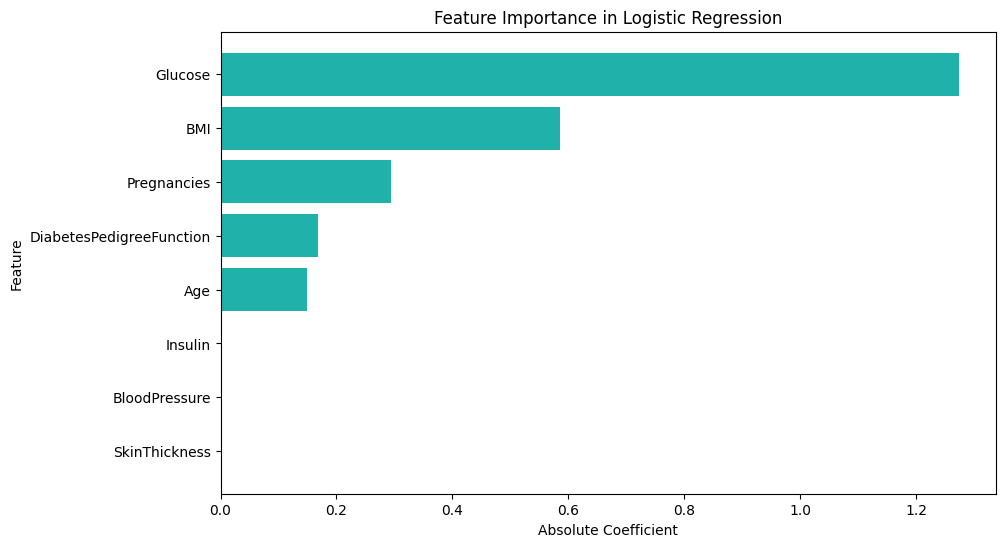

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute_Coefficient'], color='lightseagreen')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Agar fitur dengan pengaruh terbesar di atas
plt.show()

# **RANDOM FOREST**

In [10]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(class_weight='balanced', random_state=42)
RF_class.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
y_predict=RF_class.predict(x_test)

In [12]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



### **Hyperparameter Tuning**

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [14]:
RF_class2 = RandomForestClassifier(class_weight='balanced', random_state=42)
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [15]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 6}
Accuracy : 0.7622817539650806


In [16]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'gini',max_depth=6)

In [17]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [18]:
y_predict_best=RF_class_best.predict(x_test)

In [19]:
print('\nConfusion Matrix\n')
print(confusion_matrix(y_test, y_predict_best))

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Confusion Matrix

[[97 10]
 [16 31]]

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [20]:
import joblib
joblib.dump(RF_class_best, "RF_best_Model.pkl")

['RF_best_Model.pkl']

In [ ]:
# Ambil skor penting fitur dari model Random Forest
importances = RF_class.feature_importances_

# Gabungkan dengan nama fitur (misalnya, dari x_train.columns)
features = x_train.columns

# Buat DataFrame untuk analisis
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Urutkan berdasarkan tingkat kepentingan tertinggi
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan hasil analisis fitur penting
print("Fitur Penting Berdasarkan Random Forest:")
print(importance_df)

Fitur Penting Berdasarkan Random Forest:
                    Feature  Importance
1                   Glucose    0.268641
5                       BMI    0.168682
7                       Age    0.147779
6  DiabetesPedigreeFunction    0.120600
2             BloodPressure    0.082828
0               Pregnancies    0.074545
3             SkinThickness    0.073768
4                   Insulin    0.063155


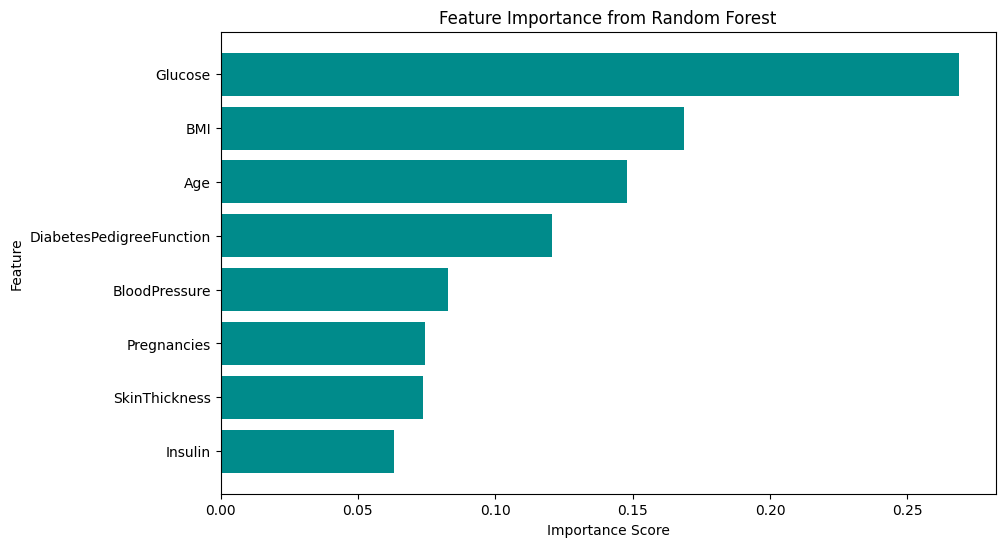

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkcyan')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.63      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154



### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [ ]:
DT_class2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [ ]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :",DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 2}
Accuracy : 0.7231907237105157


In [ ]:
#Train the data using based parameter
DT_class_best = DecisionTreeClassifier(criterion= 'gini', max_depth=2)

In [ ]:
DT_class_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_predict_best=DT_class_best.predict(x_test)

In [ ]:
print('\nConfusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0', '1']))


Confusion Matrix

[[85 22]
 [12 35]]

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
# Ambil fitur penting dari model Decision Tree
importances = DT_class.feature_importances_

# Gabungkan dengan nama-nama fitur dari x_train
features = x_train.columns

# Buat DataFrame untuk analisis fitur penting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Urutkan berdasarkan tingkat kepentingan fitur
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan hasil analisis fitur penting
print("Fitur Penting Berdasarkan Decision Tree:")
print(importance_df)

Fitur Penting Berdasarkan Decision Tree:
                    Feature  Importance
1                   Glucose    0.315325
5                       BMI    0.209066
7                       Age    0.146367
6  DiabetesPedigreeFunction    0.114483
2             BloodPressure    0.080864
0               Pregnancies    0.076049
3             SkinThickness    0.035318
4                   Insulin    0.022527


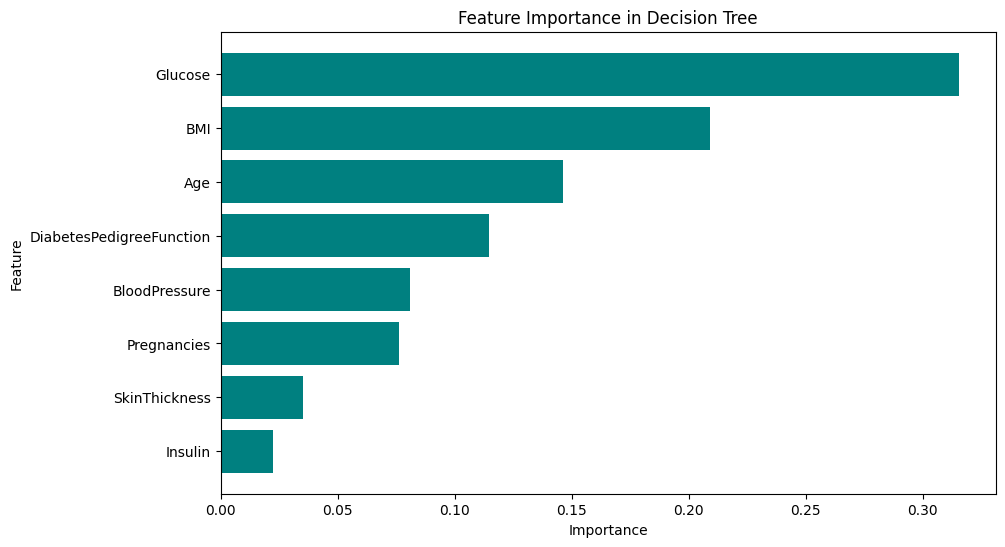

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

**ROC CURVE**

Text(0.5, 1.0, 'ROC Curve for All Models (Label 0)')

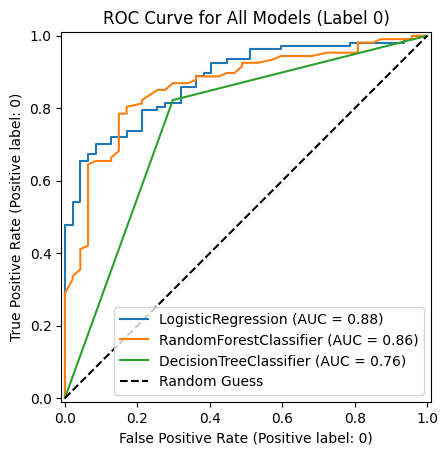

In [ ]:
from sklearn.metrics import RocCurveDisplay

# ROC Curve untuk Logistic Regression untuk label 0
log_display = RocCurveDisplay.from_estimator(log_model, x_test, y_test, pos_label=0)

# ROC Curve untuk Random Forest untuk label 0
rf_display = RocCurveDisplay.from_estimator(RF_class, x_test, y_test, ax=log_display.ax_, pos_label=0)

# ROC Curve untuk Decision Tree untuk label 0
dt_display = RocCurveDisplay.from_estimator(DT_class, x_test, y_test, ax=log_display.ax_, pos_label=0)

# Menambahkan garis acuan (random guess)
log_display.ax_.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Menambahkan legenda dan judul
log_display.ax_.legend(loc='lower right')
log_display.ax_.set_title('ROC Curve for All Models (Label 0)')


Text(0.5, 1.0, 'ROC Curve for All Models (Label 1)')

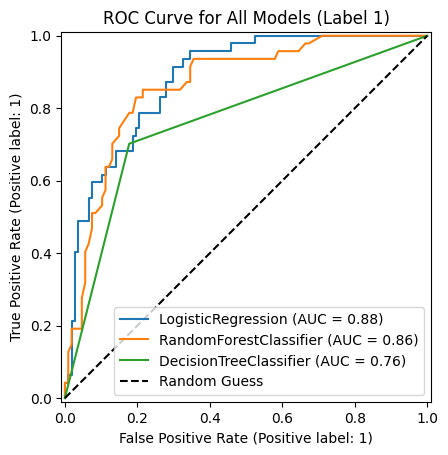

In [ ]:
from sklearn.metrics import RocCurveDisplay

# ROC Curve untuk Logistic Regression untuk label 1
log_display = RocCurveDisplay.from_estimator(log_model, x_test, y_test, pos_label=1)

# ROC Curve untuk Random Forest untuk label 1
rf_display = RocCurveDisplay.from_estimator(RF_class, x_test, y_test, ax=log_display.ax_, pos_label=1)

# ROC Curve untuk Decision Tree untuk label 1
dt_display = RocCurveDisplay.from_estimator(DT_class, x_test, y_test, ax=log_display.ax_, pos_label=1)

# Menambahkan garis acuan (random guess)
log_display.ax_.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Menambahkan legenda dan judul
log_display.ax_.legend(loc='lower right')
log_display.ax_.set_title('ROC Curve for All Models (Label 1)')